## **OpenAI Gym, PyBullet and PyBulletGym Installation**
[Click here to see Gym documentaion](https://gym.openai.com/docs/)

[Click here to see PyBullet documentaion](https://docs.google.com/document/d/10sXEhzFRSnvFcl3XxNGhnD4N2SedqwdAvK3dsihxVUA)

[Click here to see PyBulletGym page](https://github.com/benelot/pybullet-gym)



**Before we start, first update the apt-get tool in the given machine.**

In [1]:
!apt-get update

Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:2 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Hit:3 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:4 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:5 http://ppa.launchpad.net/marutter/c2d4u3.5/ubuntu bionic InRelease [15.4 kB]
Get:6 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease [3,626 B]
Get:7 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Ign:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:9 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:10 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:11 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:12 http://ppa.launchpad.net/marutter/c2d4u3.5/ubuntu bionic/main Sources [1,815

Most of the requirements of python packages are already fulfilled on Colab. To run Gym, you have to install prerequisites like xvbf,opengl & other python-dev packages using the following codes.

In [2]:
!pip install gym
!apt-get install python-opengl -y
!apt install xvfb -y

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Suggested packages:
  libgle3
The following NEW packages will be installed:
  python-opengl
0 upgraded, 1 newly installed, 0 to remove and 41 not upgraded.
Need to get 496 kB of archives.
After this operation, 5,416 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 python-opengl all 3.1.0+dfsg-1 [496 kB]
Fetched 496 kB in 0s (4,929 kB/s)
Selecting previously unselected package python-opengl.
(Reading database ... 144429 files and directories currently installed.)
Preparing to unpack .../python-opengl_3.1.0+dfsg-1_all.deb ...
Unpacking python-opengl (3.1.0+dfsg-1) ...
Setting up python-opengl (3.1.0+dfsg-1) ...
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  xvfb
0 upgraded, 1 newly installed, 0 to remove and 41 not upgraded.
Need to get 784 kB o

For rendering environment, you can use pyvirtualdisplay. So fulfill that

In [3]:
!pip install pyvirtualdisplay
!pip install piglet

     |████████████████████████████████| 71kB 5.3MB/s 
     |████████████████████████████████| 92kB 9.4MB/s 


**Newly added step: installing Atari!**

In [4]:
!pip install gym[atari]

In [5]:
!pip install pybullet==2.5.9

     |████████████████████████████████| 82.7MB 49kB/s 
  Created wheel for pybullet: filename=pybullet-2.5.9-cp36-cp36m-linux_x86_64.whl size=94375307 sha256=63190bbf1a6a336293694dcdd3ff4ed5b0d881ef09387f594c72ab268e9251e7
  Stored in directory: /root/.cache/pip/wheels/e4/be/17/68e1fc91e1594bbc35330ae240f2c74dcce4219786729e034f
Successfully built pybullet


In [6]:
!git clone https://github.com/benelot/pybullet-gym.git

Cloning into 'pybullet-gym'...
remote: Enumerating objects: 735, done.
remote: Total 735 (delta 0), reused 0 (delta 0), pack-reused 735
Receiving objects: 100% (735/735), 19.29 MiB | 16.66 MiB/s, done.
Resolving deltas: 100% (405/405), done.


In [7]:
cd /content/pybullet-gym/

/content/pybullet-gym


In [8]:
!pip install -e .

Obtaining file:///content/pybullet-gym
  Running setup.py develop for pybulletgym


Import everything.

In [0]:
import gym
from gym import logger as gymlogger
from gym.wrappers import Monitor
gymlogger.set_level(40) # error only
import pybulletgym  # register PyBullet enviroments with open ai gym
import pybullet
import pybullet_data

import numpy as np
import random
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import math
import glob
import io
import base64

from IPython.display import HTML
from IPython import display as ipythondisplay

# Colab comes with PyTorch
import torch
import torch.nn as nn
import torch.autograd as autograd
import collections
import itertools
from collections import deque

from torch.autograd import Variable

import torchvision.transforms as T
from torch.nn import functional as F
from PIL import Image

To activate virtual display, we need to run a script once for training an agent, as follows:

In [10]:
from pyvirtualdisplay import Display
display = Display(visible=0, size=(1400, 900))
display.start()

xdpyinfo was not found, X start can not be checked! Please install xdpyinfo!


<Display cmd_param=['Xvfb', '-br', '-nolisten', 'tcp', '-screen', '0', '1400x900x24', ':1001'] cmd=['Xvfb', '-br', '-nolisten', 'tcp', '-screen', '0', '1400x900x24', ':1001'] oserror=None return_code=None stdout="None" stderr="None" timeout_happened=False>

The following code creates a virtual display to draw game images on. If you are running locally, just ignore it.

In [0]:
import os
if type(os.environ.get("DISPLAY")) is not str or len(os.environ.get("DISPLAY"))==0:
    !bash ../xvfb start
    %env DISPLAY=:1

In [0]:
"""
Utility functions to enable video recording of gym environment and displaying it
To enable video, just do "env = wrap_env(env)""
"""

def show_video():
  mp4list = glob.glob('/content/video/*.mp4')
  if len(mp4list) > 0:
    mp4 = mp4list[0]
    video = io.open(mp4, 'r+b').read()
    encoded = base64.b64encode(video)
    ipythondisplay.display(HTML(data='''<video alt="test" autoplay 
                loop controls style="height: 400px;">
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>'''.format(encoded.decode('ascii'))))
  else: 
    print("Could not find video")
    

def wrap_env(env):
  env = Monitor(env, '/content/video', force=True)
  return env

# **Test three environments that we are going to use.**
## Breakout

Breakout-ram-v0: belongs to  Atari, with discrete action space.

See what it looks like: https://gym.openai.com/envs/Breakout-ram-v0/

In [13]:
env = gym.make("Breakout-ram-v0")
print("env.action_space: ", env.action_space)

n_episode = 20    # number of episodes
max_steps = 1000   # maximum steps for each episode

# Iterate through all episodes
for i_episode in range(n_episode):
    observation = env.reset()

    # Iterate through all steps
    for t in range(max_steps):
        env.render()
        s = observation
        a = env.action_space.sample() # sample an action

        # One step
        observation, r, done, info = env.step(a) # s_prime: next observation, r: immediate reward, done: terminal state indicator
        s_prime = observation

        # Ends this episode if reaching a terminal state
        if done:
            print("Episode finished after {} timesteps".format(t+1))
            break

# should return a state vector if everything worked
env.reset()

env.action_space:  Discrete(4)
Episode finished after 164 timesteps
Episode finished after 202 timesteps
Episode finished after 344 timesteps
Episode finished after 197 timesteps
Episode finished after 363 timesteps
Episode finished after 351 timesteps
Episode finished after 314 timesteps
Episode finished after 172 timesteps
Episode finished after 231 timesteps
Episode finished after 181 timesteps
Episode finished after 241 timesteps
Episode finished after 271 timesteps
Episode finished after 209 timesteps
Episode finished after 170 timesteps
Episode finished after 247 timesteps
Episode finished after 281 timesteps
Episode finished after 169 timesteps
Episode finished after 184 timesteps
Episode finished after 318 timesteps
Episode finished after 357 timesteps


array([ 63,  63,  63,  63,  63,  63, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 192, 192, 192, 192, 192, 192, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 240,   0,   0,
       255,   0,   0, 240,   0,   5,   0,   0,   6,   0,  70, 182, 134,
       198,  22,  38,  54,  70,  88,   6, 146,   0,   8,   0,   0,   0,
         0,   0,   0, 241,   0, 242,   0, 242,  25, 241,   5, 242,   0,
         0, 255,   0, 228,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   8,   0, 255, 255, 255, 255, 255, 255, 255,
         0,   0,   5,   0,   0, 186, 214, 117, 246, 219, 242], dtype=uint8)

# Assignment 3 : Implementation

In [0]:
class initNeuralNetwork(nn.Module): 

    def __init__(self, input, output):
        super(initNeuralNetwork, self).__init__()
        self.input = input
        self.output = output

        #Neural Network definition (passing inputs and output to train NN
        self.neuralNetwork = nn.Sequential(nn.Linear(self.input[0], 128), nn.ReLU(), nn.Linear(128, 256), nn.ReLU(), nn.Linear(256, self.output))

    def forward(self, state):
        return self.neuralNetwork(state)

class BasicBuffer:  #creating buffer to be used as replay buffer for dqn

    def __init__(self, max_size):
        self.max_size = max_size
        self.buffer = collections.deque(maxlen=max_size)
        self.buffer = deque(maxlen=max_size)

    def push(self, state, action, reward, next_state, done): #Function used to push values in replay buffer
        experience = (state.reshape(-1), action, np.array([reward]), next_state.reshape(-1), done)
        self.buffer.append(experience)

    def sample(self, batch_size):
        state_batch = []
        action_batch = []
        reward_batch = []
        next_state_batch = []
        done_batch = []

        batch = random.sample(self.buffer, batch_size) #Generating random samples

        for experience in batch: #Batch wise iteration for calculating next step action
            state, action, reward, next_state, done = experience
            state_batch.append(state)
            action_batch.append(action)
            reward_batch.append(reward)
            next_state_batch.append(next_state)
            done_batch.append(done)

        return (state_batch, action_batch, reward_batch, next_state_batch, done_batch)
      
    def __len__(self):  #Calculate length of buffer
      return len(self.buffer)

In [0]:
env1 = "Breakout-ram-v0"

In [0]:
def plot(env_name,episode_rewards): #Function to plot cumulative rewards and episodes
  plt.plot(list(range(1,len(episode_rewards)+1)),episode_rewards)
  plt.ylabel("Cumulative Rewards")
  plt.xlabel("Episodes")
  plt.title(env_name)



In [0]:
n_episodes = 100
max_steps = 1000
bining_array = [-1.0, 0.0, 1.0] #bining for discreization
batch_size=32
target_update_rate = 3

# DQN (Assignment 1)

In [0]:
class DQN_Agent:  #Implementation of DQN

    def __init__(self, env, bin_array, learning_rate=3e-4, gamma=0.99,buffer_size=10000):
        self.env = env
        self.bin_array = bin_array
        self.learning_rate = learning_rate
        self.gamma = gamma
        self.replay_buffer = BasicBuffer(max_size=buffer_size)
        self.discretization = {}

        self.flag_discrete = not isinstance(env.action_space, gym.spaces.discrete.Discrete)  # Checking for discretization based on the flag
        if self.flag_discrete:
            num_actions = env.action_space.sample().shape[0]
        else:
            num_actions = env.action_space.n
        tmp1_list = [[*x] for x in list(itertools.product(*[list(range(len(self.bin_array) - 1)) for x in range(num_actions)]))]
        for i in range(len(tmp1_list)):
            self.discretization[i] = tmp1_list[i]

        if isinstance(env.action_space.sample(), int):
            self.model = initNeuralNetwork(env.observation_space.shape, env.action_space.n)
            self.target_model = initNeuralNetwork(env.observation_space.shape, env.action_space.n)
        else:
            self.model = initNeuralNetwork(env.observation_space.sample().shape,
                             int(math.pow(len(bin_array) - 1, env.action_space.sample().shape[0])))
            self.target_model = initNeuralNetwork(env.observation_space.sample().shape,
                                    int(math.pow(len(bin_array) - 1, env.action_space.sample().shape[0])))

        self.target_model.load_state_dict(self.model.state_dict())
        self.target_model.eval()

        self.optimizer = torch.optim.Adam(self.model.parameters())
        self.L1_loss = nn.L1Loss()

    def get_action(self, state, discretize=False, eps=0.20):
        state = torch.FloatTensor(state.reshape(-1)).float().unsqueeze(0)
        qvals = self.model.forward(state)
        action = np.argmax(qvals.cpu().detach().numpy())

        if (np.random.randn() < eps):
            tmp_action = self.env.action_space.sample()
            if discretize:
                tmp_action = np.digitize(tmp_action, self.bin_array) - 1

            return tmp_action

        if discretize:
            action = np.array(self.discretization[action])

        return action

    def compute_loss(self, batch):
        states, actions, rewards, next_states, dones = batch
        states = torch.FloatTensor(states)
        actions = torch.LongTensor(actions)
        rewards = torch.FloatTensor(rewards)
        next_states = torch.FloatTensor(next_states)
        dones = torch.FloatTensor(dones)
        curr_Q = self.model.forward(states).gather(1, actions.unsqueeze(1))
        curr_Q = curr_Q.squeeze(1)
        next_Q = self.target_model.forward(next_states)

        max_next_Q = torch.max(next_Q, 1)[0]
        expected_Q = rewards.squeeze(1) + self.gamma * max_next_Q

        loss = self.L1_loss(curr_Q, expected_Q)
        return loss

    def update(self, batch_size):
        batch = self.replay_buffer.sample(batch_size)
        loss = self.compute_loss(batch)

        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()

    def update_target(self):
        self.target_model.load_state_dict(self.model.state_dict())



In [0]:
def train_dqn_learning(env, class_dqn, n_episodes, max_steps, batch_size):
    episode_rewards = []
    discretize_flag = not isinstance(env.action_space, gym.spaces.discrete.Discrete)
    for episode in range(n_episodes):
        state = env.reset()
        episode_reward = 0
        for step in range(max_steps):
            action = class_dqn.get_action(state, discretize=discretize_flag)

            if discretize_flag:
                analog_action = []
                for bin in action:
                    analog_action.append(np.random.uniform(bining_array[bin],bining_array[bin+1],1))

                analog_action = [x[0] for x in analog_action]
                next_state, reward, done, _ = env.step(analog_action)
                class_dqn.replay_buffer.push(state, action[0], reward, next_state, done)
            else:
                next_state, reward, done, _ = env.step(action)
                class_dqn.replay_buffer.push(state, action, reward, next_state, done)
            episode_reward += reward

            if len(class_dqn.replay_buffer) > batch_size:
                class_dqn.update(batch_size)

            if done or step == max_steps-1:
                episode_rewards.append(episode_reward)
                print("Episode " + str(episode) + ": " + str(episode_reward))
                break

            state = next_state
        
        if episode % target_update_rate == 0:
            class_dqn.update_target()

    return episode_rewards


Episode 0: 0.0
Episode 1: 2.0
Episode 2: 0.0
Episode 3: 2.0
Episode 4: 2.0
Episode 5: 2.0
Episode 6: 0.0
Episode 7: 0.0
Episode 8: 2.0
Episode 9: 0.0
Episode 10: 0.0
Episode 11: 0.0
Episode 12: 2.0
Episode 13: 3.0
Episode 14: 2.0
Episode 15: 2.0
Episode 16: 3.0
Episode 17: 0.0
Episode 18: 0.0
Episode 19: 0.0
Episode 20: 4.0
Episode 21: 2.0
Episode 22: 0.0
Episode 23: 3.0
Episode 24: 9.0
Episode 25: 1.0
Episode 26: 2.0
Episode 27: 0.0
Episode 28: 2.0
Episode 29: 3.0
Episode 30: 0.0
Episode 31: 3.0
Episode 32: 0.0
Episode 33: 3.0
Episode 34: 2.0
Episode 35: 2.0
Episode 36: 2.0
Episode 37: 2.0
Episode 38: 2.0
Episode 39: 2.0
Episode 40: 0.0
Episode 41: 2.0
Episode 42: 4.0
Episode 43: 2.0
Episode 44: 2.0
Episode 45: 2.0
Episode 46: 0.0
Episode 47: 2.0
Episode 48: 2.0
Episode 49: 0.0
Episode 50: 0.0
Episode 51: 0.0
Episode 52: 2.0
Episode 53: 2.0
Episode 54: 2.0
Episode 55: 2.0
Episode 56: 2.0
Episode 57: 2.0
Episode 58: 1.0
Episode 59: 0.0
Episode 60: 2.0
Episode 61: 2.0
Episode 62: 3.0
Ep

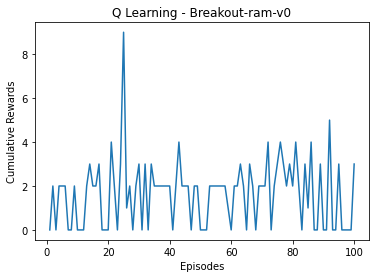

In [42]:
env=gym.make(env1)
episode_rewards = train_dqn_learning(env, DQN_Agent(env, bining_array), n_episodes, max_steps, batch_size)
print(episode_rewards)
plot("DQN Learning - Breakout-ram-v0",episode_rewards)


#DYNA Q with DQN (Image based)

In [0]:
'''
This shows the implementation of the Variation Encoder of the dreaming-policy paper.
Variational Autoencoder is used for:
   - Encoder: to convert the input image into encoded output images or states
   - Decoder: to convert encoded images or states into images output
   - Variational AutoEncoder: combines Encoder and Decoder
Note: for the following Variationcal encoder layers and CNN definitions are picked similar to the dreaming-policy paper
'''

'''
Encoder Part
'''
class Encoder(nn.Module):
    def __init__(self, input_dim, z_dim):
        #Initializing the network
        super().__init__()
        self.encoder = nn.Sequential(
        nn.Conv2d(3, 16, kernel_size=(4,4), stride=2),
        nn.ReLU(),
        nn.Conv2d(16, 32, kernel_size=(4,4), stride=2),
        nn.ReLU(),
        nn.Conv2d(32, 16, kernel_size=(4,4), stride=2),
        nn.ReLU(),
        nn.Conv2d(16, 32, kernel_size=(4,4), stride=2),
        nn.ReLU()
        )
        # Caluculating mean and variance
        self.mean = nn.Conv2d(32, 32, kernel_size=(1,1), stride=1)
        self.variance = nn.Conv2d(32, 32, kernel_size=(1,1), stride=1)

    def forward(self, x):
        #Model to obtain the hidden layer i.e. output fo encoded part
        layer = self.encoder(x)
        z_mean = self.mean(layer)
        z_variance = self.variance(layer)
        return z_mean, z_variance

'''
Decoder Part
'''
class Decoder(nn.Module):
    def __init__(self, z_dim, output_dim, layer_dim=100):
        super().__init__()
        #Initializing network
        self.decoder = nn.Sequential(
        nn.Conv2d(32, 64, kernel_size=(3, 3), stride=1, padding=1),
        nn.ReLU(),
        nn.ConvTranspose2d(64, 32, kernel_size=(4, 4), stride=1),
        torch.nn.Upsample(scale_factor=2),
        nn.ConvTranspose2d(32, 16, kernel_size=(4, 4), stride=1),
        torch.nn.Upsample(scale_factor=2),
        nn.ConvTranspose2d(16, 8, kernel_size=(4, 4), stride=1),
        torch.nn.Upsample(scale_factor=2),
        nn.ConvTranspose2d(8, 3, kernel_size=(4, 4), stride=1),
        torch.nn.Upsample(scale_factor=2),
        nn.ConvTranspose2d(3, 3, kernel_size=(4, 4), stride=1),
        torch.nn.Upsample(size=(64, 64))
        )

    def forward(self, x):
        decoded = self.decoder(x)
        return decoded

'''
Variation Autoencoder
'''
class VariationalAutoEncoder(nn.Module):
    def __init__(self, input_dim, z_dim):
        output_dim = input_dim
        super(VariationalAutoEncoder, self).__init__()
        self.encoder = Encoder(input_dim, z_dim)
        self.decoder = Decoder(z_dim, output_dim)

    def encode(self, x):
        mean,variance = self.encoder(x)
        return mean, variance

    def decode(self, z):
        decoded = self.decoder(z)
        return decoded 

    def reparameterize(self, mean: Variable, log_variance: Variable) -> Variable:
        if self.training:
            std = log_variance.mul(0.5).exp_()  # type: Variable
            eps = Variable(std.data.new(std.size()).normal_())
            return eps.mul(std).add_(mean)
        else:
            return mean
            
    def forward(self, x):
        mean, log_variance = self.encode(x)
        z = self.reparameterize(mean, log_variance)
        return z, self.decode(z), mean, log_variance

In [0]:
'''
This part of the program contains the StateTransitionModel definition
which is used to generate the next state based on the present states.
For this, input is encoded image (state s) and it generates output encoded images (state s')
'''

class StateTransitionModel(nn.Module):
    def __init__(self, n_action):
        super(StateTransitionModel, self).__init__()

        self.GenerateAction1 = nn.Sequential(
            nn.Linear(n_action, 64),
            nn.Linear(64, 128),
            nn.LeakyReLU(),
        )

        self.GenerateAction2 = nn.Sequential(
            nn.Conv2d(32,16,kernel_size=(3,3), stride=1, padding=1),
            nn.Conv2d(16,32,kernel_size=(1,1),stride=1),
            nn.LeakyReLU(),
        )

        self.regressor = nn.Sequential(
        nn.Conv2d(64, 32, kernel_size=(3,3), stride=1, padding=1),
        nn.LeakyReLU(),
        nn.Conv2d(32, 32, kernel_size=(1,1), stride=1),
        nn.LeakyReLU(),
        nn.Conv2d(32, 16, kernel_size=(3,3), stride=1, padding=1),
        nn.LeakyReLU(),
        nn.Conv2d(16, 32, kernel_size=(1,1), stride=1),
        nn.LeakyReLU()
        )

    def forward(self, x, a):
        action_generated = torch.reshape(self.GenerateAction1(a), (-1,32,2,2))
        action_generated = self.GenerateAction2(action_generated)
        x_new = torch.cat((x,action_generated), 1)
        return self.regressor(x_new)

In [0]:
'''
This class is used to claculate the simulation based reward using the action generated 
without actual environment
'''
class RewardObtained(nn.Module):
    def __init__(self):
        super(RewardObtained, self).__init__()

        self.ActionGenerated1 = nn.Sequential(
            nn.Conv2d(32, 32, kernel_size=(2,2), stride=1),
            nn.ReLU(),
            nn.Conv2d(32, 1, kernel_size=(1,1), stride=2, padding=1)
        )
        self.ActionGenerated2 = nn.Sequential(
            nn.Linear(4, 2),
            nn.Sigmoid()
        )

    def forward(self, x):
        values = self.ActionGenerated2(self.ActionGenerated1(x).view(-1,4))
        return values[:,0], values[:,1]

In [0]:
''' 
This part of the program contains the loss function used for different networks
'''

#MSE Loss:
mse = nn.MSELoss()

#Loss for Variation AutoEncoder
def VAELossFunction(out, x, mean, variance, batch_size):
    BCE = F.binary_cross_entropy_with_logits(out, x, reduce=False)
    KLD = -0.5 * torch.sum(1 + variance - mean.pow(2) - variance.exp())
    KLD /= batch_size * (output_dim * output_dim)
    return (BCE + KLD).mean([1,2,3])

#Loss for State Transition Model
def RewardLossFunction(actual_reward, predicted_reward, actual_done, predicted_done):
    x = actual_reward.reshape(-1)
    y = predicted_reward*(1-predicted_done).reshape(-1)
    l1 = mse(x,y)
    l2=mse(actual_done, predicted_done)
    return l1+l2

#Loss for Reward calculation model
def StateTransitionModelLossFunction(state_trans_inp, enc_next_img, dec_state_trans_inp, next_img):
    l1 = F.binary_cross_entropy_with_logits(state_trans_inp, enc_next_img, reduce=False).mean([1,2,3])
    l2 = F.binary_cross_entropy_with_logits(dec_state_trans_inp, next_img, reduce=False).mean([1,2,3])
    return torch.abs(l1 + l2)


In [0]:
'''
Function to Generated action based on the input state
'''
def GenerateAction(state):
    sample = random.random()

    if (np.random.randn() < epsilon_val):
        tmp_action = env.action_space.sample()
        return torch.tensor(tmp_action)

    with torch.no_grad():
        a=policy_net(state)
        return a.max(1)[1].view(1, 1)

In [0]:
''' 
This function is used to render the environment and obtained images of the 
Breakout environment for different state values
'''
def get_screen():
    screen = env.render(mode='rgb_array').transpose((2, 0, 1))
    screen = np.ascontiguousarray(screen, dtype=np.float32) / 255
    screen = torch.from_numpy(screen)  
    resize = T.Compose([T.ToPILImage(), T.Resize((64,64), interpolation=Image.CUBIC), T.ToTensor()])
    screen_val = resize(screen).unsqueeze(0)
    return screen_val

In [0]:
'''
Updating Policy based on the random state and action pairs
'''

def PolicyUpdateDQN(learn_steps, target_update_rate):
    if learn_steps % target_update_rate:
        target_net.load_state_dict(policy_net.state_dict())

    #Sample from memory for state and action 
    sample_states, sample_ar, sample_done = memory.sample(batch_size)
    action_data = sample_ar[:,0]
    action_data = np.reshape(action_data, (action_data.shape[0], 1))
    state_action_values = policy_net(torch.Tensor(sample_states[:,:,0].reshape(-1, 3, 64, 64))).gather(1, torch.tensor(action_data, dtype=torch.long)).reshape(-1)
    next_state_action_values = target_net(torch.Tensor(sample_states[:,:,1].reshape(-1, 3, 64, 64)))
    target_q_vals = torch.tensor(sample_ar[:,1]) + discount_factor*next_state_action_values.max(1)[0] * torch.tensor(1-sample_done).reshape(-1)

    #Calculating loss
    dqn_loss = DQN_loss_function(state_action_values, target_q_vals)
    dqn_optimizer.zero_grad()
    dqn_loss.backward()
    dqn_optimizer.step()

In [0]:
'''
Updating DYNAQ model based on the random state and action pairs
'''

def UpdateDYNAQ():
    DYNAQ_Model.train()
    #Samples of action state pair from memory
    sample_states, sample_ar, sample_done = memory.sample(batch_size)
    curr_states = torch.Tensor(sample_states[:,:,0].reshape(-1, 3, 64, 64))
    action_data = torch.tensor(np.reshape(sample_ar[:, 0], (sample_ar.shape[0], 1)))

    reward_data = torch.tensor(sample_ar[:, 1])
    state_trans_out, next_pred_img, dec_state_trans_inp, reward_val, done_val, vae_mu, vae_var = DYNAQ_Model(curr_states, action_data, train_flag=True)
    next_img = torch.tensor((sample_states[:, :, 1].reshape(-1, 3, 64, 64)))
    enc_next_img = DYNAQ_Model.vae.reparameterize(*DYNAQ_Model.vae.encoder(next_img.float()))

    #Calculate loss for state, reward values
    l1 = RewardLossFunction(reward_data, reward_val, torch.tensor(sample_done), done_val)
    l2 = StateTransitionModelLossFunction(state_trans_out, enc_next_img, dec_state_trans_inp, next_img)
    l3 = VAELossFunction(dec_state_trans_inp, curr_states, vae_mu, vae_var, batch_size)
    dyna_loss = l1+l2+l3
    dyna_optimizer.zero_grad()
    dyna_loss.sum().backward()
    dyna_optimizer.step()
    DYNAQ_Model.eval()

In [0]:
'''
Simulating randomly generated state action pair - DYNA Q 
'''

def SimulationDYNA(learn_simulate_steps, target_update_rate):
    if learn_simulate_steps % target_update_rate:
        target_net.load_state_dict(policy_net.state_dict())

    #Samples of state action pair from memory
    sample_states, sample_ar, sample_done = memory.sample(1)
    curr_states = sample_states[:,:,0].reshape(1,3,64,64)
    next_states = sample_states[:, :, 1].reshape(1, 3, 64, 64)
    action_data = np.random.randint(0, n_actions-1, curr_states.shape[0])
    action_data = np.reshape(action_data, (action_data.shape[0],1))
    next_state, reward_val, done_val = DYNAQ_Model(torch.Tensor(curr_states), torch.Tensor(action_data))


In [0]:
'''
DQN:
This part contains the implementation of Replay Memory and DQN

'''

class ReplayMemory(object): #Class definition for ReplayMemory

    def __init__(self, capacity): #Initializing network
        self.capacity = capacity
        self.memory_states = np.zeros((capacity, 3*64*64, 2))
        self.memory_action_rewards = np.zeros((capacity, 2))
        self.memory_done = np.zeros((capacity, 1))
        self.position = 0
        self.counter = 0

    def push(self, params):
        # Saves transition
        self.memory_states[self.position, :] = np.hstack((params[0].reshape(-1,1), params[2].reshape(-1,1)))
        self.memory_action_rewards[self.position, :] = np.hstack((params[1].reshape(-1), params[3]))
        self.memory_done[self.position, :] = params[4]
        self.position = (self.position + 1) % self.capacity
        self.counter = self.counter + 1

    def sample(self, batch_size):
        indexes = [random.randrange(0, batch_size) for p in range(0, batch_size)]
        return np.take(self.memory_states,indexes, axis=0), np.take(self.memory_action_rewards, indexes, axis=0), np.take(self.memory_done, indexes, axis=0)
    
    def __len__(self):
        return self.counter

#Class definition of DQN

class DQN(nn.Module):
    #Initialization of Network
    def __init__(self, h, w, outputs):
        super(DQN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=5, stride=2)
        self.bn1 = nn.BatchNorm2d(16)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=5, stride=2)
        self.bn2 = nn.BatchNorm2d(32)
        self.conv3 = nn.Conv2d(32, 64, kernel_size=5, stride=2)
        self.bn3 = nn.BatchNorm2d(64)

        # Number of Linear input connections depends on output of conv2d layers
        # and therefore the input image size, so compute it.
        def conv2d_size_out(size, kernel_size = 5, stride = 2):
            return (size - (kernel_size - 1) - 1) // stride  + 1
        convw = conv2d_size_out(conv2d_size_out(conv2d_size_out(w)))
        convh = conv2d_size_out(conv2d_size_out(conv2d_size_out(h)))
        linear_input_size = convw * convh * 64
        self.head = nn.Sequential(
            nn.Linear(linear_input_size, 64),
            nn.Linear(64, outputs)
        )

    # Called with either one element to determine next action, or a batch
    # during optimization. Returns tensor([[left0exp,right0exp]...]).
    def forward(self, x):
        x = F.relu(self.bn1(self.conv1(x)))
        x = F.relu(self.bn2(self.conv2(x)))
        x = F.relu(self.bn3(self.conv3(x)))
        return self.head(x.view(x.size(0), -1))



In [0]:
'''
DNYAQ:
This part contains the implementation of DYNAQ
'''
#Class definition
class DYNAQ(nn.Module):
    #Initialization
    def __init__(self, input_dim, n_actions):
        super().__init__()
        n_action_dims = 1
        self.vae = VariationalAutoEncoder(input_dim, z_dim)
        self.state_transition = StateTransitionModel(n_action_dims)
        self.reward_obtained = RewardObtained()

    def forward(self, state_image, action, train_flag=False):
        encoded_image, decoded_image, mean, variance = self.vae(state_image)
        state_transition_output = self.state_transition(encoded_image, action.float())
        next_state_img = self.vae.decoder(state_transition_output)
        reward, done = self.reward_obtained(state_transition_output)
        reward_ = reward * 30
        done = torch.where(done>0.5,torch.ones(done.shape),torch.zeros(done.shape))
        
        if train_flag:
            return state_transition_output, next_state_img, decoded_image, reward_, done, mean, variance

        return next_state_img, reward_, done


In [0]:
''' 
This function contains the main training part for the agent
In this function for every episode state is being obtained from the screen
and based on screen state and action is generated.
Now based on this action DYNA Q model (deterministic model) is genrated
which is used to update the policy as per the offline implementation
'''

def CoreImplementationTraining(n_episodes, max_steps, batch_size, target_update_rate): ## Offline DYNA Q Implementation

    cumulative_rewards = []
    for episode in range(n_episodes):
        episode_reward = 0

        # Initialize the environment and state (state is obtained from the screen)
        env.reset()
        state = get_screen()
        iter_ = 1
        while True:
            # Select and perform an action
            action = GenerateAction(state)
            next_state_, reward, done, _ = env.step(action.item())
            
            episode_reward += reward
            reward = torch.tensor([reward])

            current_screen = get_screen()
            if not done:
                next_state = current_screen
            else:
                cumulative_rewards.append(episode_reward)
                print("Episode " + str(episode) + ": " + str(episode_reward))
                break

            # Storing the transition in memory
            memory.push([state, action, next_state, reward, done])
            state = next_state

            # Updating Policy
            if iter_ % batch_size == 0:
                UpdateDYNAQ()
                PolicyUpdateDQN(iter_, target_update_rate)

            # Simulating for random States and Action Pairs
            for iter_2 in range(target_update_rate):
                SimulationDYNA(iter_, target_update_rate)


            iter_ = iter_ + 1

    return cumulative_rewards

In [0]:
''' 
DYNA Q Wrapper Implementation
This function acts as an wrapper for all the above function.
It creates object for class DQN & DYNAQ and train them respectively
Further it updates both the policy and DYNAQ based on the new states obtained.
It finally return the episodic reward values
'''
#Global Params definition

epsilon_val = 0.05
discount_factor = 0.99
target_update_rate = 100
batch_size = 50
input_dim = 64
output_dim = input_dim
z_dim = 16

env=gym.make(env1)

#Generating objects for policy net and target for DQN class
n_actions = env.action_space.n
policy_net = DQN(input_dim, output_dim, n_actions)
target_net = DQN(input_dim, output_dim, n_actions)
n_actions = env.action_space.n
env.reset()

target_net.load_state_dict(policy_net.state_dict())

#training for policy & target network
policy_net.train()
target_net.eval()

#initializing Replay memory buffer
memory = ReplayMemory(10000)

# Updating Policy and DYNA based on loss function
DQN_loss_function = nn.MSELoss()
DYNAQ_Model = DYNAQ(input_dim, n_actions)
DYNAQ_Model.eval()
dqn_optimizer = torch.optim.Adam(policy_net.parameters(), lr=0.01)
dyna_optimizer = torch.optim.Adam(DYNAQ_Model.parameters(), lr=0.01)

episode_rewards = []

#Generating rewards for every episodes
dynaq_offline_episode_rewards=episode_rewards.append(CoreImplementationTraining(n_episodes, max_steps, batch_size, target_update_rate))

#dynaq_offline_episode_rewards = DYNA_Q_Implementation(env, input_dim, output_dim, z_dim, n_episodes, max_steps, batch_size, target_update_rate)
print(dynaq_offline_episode_rewards)
plot("DYNAQ Learning - Breakout-ram-v0",dynaq_offline_episode_rewards)
  

## DYNA Q - Online

In [0]:
''' 
This function is replica of earlier one except slight change for online deterministic model learning i.e.
here instead of updating the policy batch wise i.e. offline we update the policy for every iteration
thus here for every episode n number of simulation occurs and model learnt from these is used for every
episode to update policy instead of like in prior
'''

def CoreImplementationTrainingOnline(n_episodes, max_steps, batch_size, target_update_rate): ## Offline DYNA Q Implementation

    cumulative_rewards = []
    for episode in range(n_episodes):
        episode_reward = 0

        # Initialize the environment and state (state is obtained from the screen)
        env.reset()
        state = get_screen()
        iter_ = 1
        while True:
            # Select and perform an action
            action = GenerateAction(state)
            next_state_, reward, done, _ = env.step(action.item())
            
            episode_reward += reward
            reward = torch.tensor([reward])

            current_screen = get_screen()
            if not done:
                next_state = current_screen
            else:
                cumulative_rewards.append(episode_reward)
                print("Episode " + str(episode) + ": " + str(episode_reward))
                break

            # Storing the transition in memory
            memory.push([state, action, next_state, reward, done])
            state = next_state

            ### Changes w.r.t. to off line policy
            # Updating policy every time instead of batch wise - Online dynamic model learning
            # i.e. updating policy and Dyna Q model everytime this Online
            
            PolicyUpdateDQN(iter_, target_update_rate)
            UpdateDYNAQ()
                

            # Simulating for random States and Action Pairs
            for iter_2 in range(target_update_rate):
                SimulationDYNA(iter_, target_update_rate)

            iter_ = iter_ + 1

    return cumulative_rewards

In [0]:
''' 
DYNA Q Wrapper Implementation
This function acts as an wrapper for all the above function.
It creates object for class DQN & DYNAQ and train them respectively
Further it updates both the policy and DYNAQ based on the new states obtained.
It finally return the episodic reward values
'''
#Global Params definition

epsilon_val = 0.05
discount_factor = 0.99
target_update_rate = 100
batch_size = 50
input_dim = 64
output_dim = input_dim
z_dim = 16

env=gym.make(env1)

#Generating objects for policy net and target for DQN class
n_actions = env.action_space.n
policy_net = DQN(input_dim, output_dim, n_actions)
target_net = DQN(input_dim, output_dim, n_actions)
n_actions = env.action_space.n
env.reset()

target_net.load_state_dict(policy_net.state_dict())

#training for policy & target network
policy_net.train()
target_net.eval()

#initializing Replay memory buffer
memory = ReplayMemory(10000)

# Updating Policy and DYNA based on loss function
DQN_loss_function = nn.MSELoss()
DYNAQ_Model = DYNAQ(input_dim, n_actions)
DYNAQ_Model.eval()
dqn_optimizer = torch.optim.Adam(policy_net.parameters(), lr=0.01)
dyna_optimizer = torch.optim.Adam(DYNAQ_Model.parameters(), lr=0.01)

episode_rewards = []

#Generating rewards for every episodes
dynaq_online_episode_rewards=episode_rewards.append(CoreImplementationTrainingOnline(n_episodes, max_steps, batch_size, target_update_rate))


#dynaq_offline_episode_rewards = DYNA_Q_Implementation(env, input_dim, output_dim, z_dim, n_episodes, max_steps, batch_size, target_update_rate)
print(dynaq_online_episode_rewards)
plot("DYNAQ Learning - Breakout-ram-v0",dynaq_online_episode_rewards)

  

# Policy Evaluation

 Offline

In [0]:
total_policy_eval_offline=0

#Generating objects for policy net and target for DQN class
n_actions = env.action_space.n
policy_net = DQN(input_dim, output_dim, n_actions)
target_net = DQN(input_dim, output_dim, n_actions)
n_actions = env.action_space.n
env.reset()

target_net.load_state_dict(policy_net.state_dict())

#training for policy & target network
policy_net.train()
target_net.eval()

#initializing Replay memory buffer
memory = ReplayMemory(10000)

# Updating Policy and DYNA based on loss function
DQN_loss_function = nn.MSELoss()
DYNAQ_Model = DYNAQ(input_dim, n_actions)
DYNAQ_Model.eval()
dqn_optimizer = torch.optim.Adam(policy_net.parameters(), lr=0.01)
dyna_optimizer = torch.optim.Adam(DYNAQ_Model.parameters(), lr=0.01)

episode_rewards = []

#Generating rewards for every episodes
dynaq_offline_episode_rewards=episode_rewards.append(CoreImplementationTraining(10, max_steps, batch_size, target_update_rate))

for i in range(10):
  total_policy_eval_offline+=dynaq_offline_episode_rewards[i]

print("Policy Evaluation Offline: ", total_policy_eval_offline/10)



Online

In [0]:

total_policy_online_eval=0


#Generating objects for policy net and target for DQN class
n_actions = env.action_space.n
policy_net = DQN(input_dim, output_dim, n_actions)
target_net = DQN(input_dim, output_dim, n_actions)
n_actions = env.action_space.n
env.reset()

target_net.load_state_dict(policy_net.state_dict())

#training for policy & target network
policy_net.train()
target_net.eval()

#initializing Replay memory buffer
memory = ReplayMemory(10000)

# Updating Policy and DYNA based on loss function
DQN_loss_function = nn.MSELoss()
DYNAQ_Model = DYNAQ(input_dim, n_actions)
DYNAQ_Model.eval()
dqn_optimizer = torch.optim.Adam(policy_net.parameters(), lr=0.01)
dyna_optimizer = torch.optim.Adam(DYNAQ_Model.parameters(), lr=0.01)

episode_rewards = []

#Generating rewards for every episodes
dynaq_online_episode_rewards=episode_rewards.append(CoreImplementationTrainingOnline(10, max_steps, batch_size, target_update_rate))

for i in range(10):
  total_policy_online_eval+=dynaq_online_episode_rewards[i]

print("Policy Evaluation Online: ",total_policy_online_eval/10)